# Import Libraries

In [1]:
import pandas as pd

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV Files

In [2]:
df = pd.read_csv('/content/hour.csv')

# Basic Analysis - Describe

In [3]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
# Rename columns to understand the table better
df.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'cnt': 'total_count'}, inplace=True)

In [7]:
df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Average

In [9]:
# Group by hour to find average bicycle usage
hourly_usage = df.groupby('hour')['total_count'].mean()

In [13]:
hourly_usage

,total_count
hour,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004


In [18]:
# Map weekday numbers (0-6) to actual day names
df['weekday_name'] = df['weekday'].map({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})

In [19]:
df[['weekday', 'weekday_name']].head()

,weekday,weekday_name
0,6,Saturday
1,6,Saturday
2,6,Saturday
3,6,Saturday
4,6,Saturday


In [20]:
# Group by weekday to find average bicycle usage
daily_usage = df.groupby('weekday_name')['total_count'].mean()

In [21]:
daily_usage

,total_count
weekday_name,
Friday,196.135907
Monday,183.744655
Saturday,190.209793
Sunday,177.468825
Thursday,196.436665
Tuesday,191.238891
Wednesday,191.130505


In [22]:
# Map month numbers (1-12) to actual month names
df['month_name'] = df['month'].map({
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
})

In [23]:
df[['month', 'month_name']].head()

,month,month_name
0,1,Jan
1,1,Jan
2,1,Jan
3,1,Jan
4,1,Jan


In [24]:
# Group by month
monthly_usage = df.groupby('month_name')['total_count'].mean()

In [25]:
monthly_usage

,total_count
month_name,
Apr,187.260960
Aug,238.097627
Dec,142.303439
Feb,112.865026
Jan,94.424773
Jul,231.819892
Jun,240.515278
Mar,155.410726
May,222.907258


In [26]:
# Map season numbers (1-4) to actual season names
df['season_name'] = df['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

In [27]:
df[['season', 'season_name']].head()

,season,season_name
0,1,Spring
1,1,Spring
2,1,Spring
3,1,Spring
4,1,Spring


In [49]:
# Group by season if the data has a 'season' column
season_usage = df.groupby('season_name')['total_count'].mean()

In [50]:
season_usage

,total_count
season_name,
Fall,236.016237
Spring,111.114569
Summer,208.344069
Winter,198.868856


In [30]:
# Map weathersit numbers (1-4) to actual weather situation names
df['weathersit_name'] = df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Coudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Snow/Rain'
})

In [31]:
df[['weathersit', 'weathersit_name']].head()

,weathersit,weathersit_name
0,1,Clear/Partly Cloudy
1,1,Clear/Partly Cloudy
2,1,Clear/Partly Cloudy
3,1,Clear/Partly Cloudy
4,1,Clear/Partly Cloudy


In [33]:
# Group by weather situations
weathersit_usage = df.groupby('weathersit_name')['total_count'].mean()

In [34]:
weathersit_usage

,total_count
weathersit_name,
Clear/Partly Cloudy,204.869272
Heavy Snow/Rain,74.333333
Light Snow/Rain,111.579281
Misty/Coudy,175.165493


In [35]:
# Map holiday numbers (0/1) to actual holiday
df['holiday_check'] = df['holiday'].map({
    0: 'No Holiday',
    1: 'Holiday'
})

In [36]:
df[['holiday', 'holiday_check']].head()

,holiday,holiday_check
0,0,No Holiday
1,0,No Holiday
2,0,No Holiday
3,0,No Holiday
4,0,No Holiday


In [37]:
# Group by holiday
holiday_usage = df.groupby('holiday_check')['total_count'].mean()

In [38]:
holiday_usage

,total_count
holiday_check,
Holiday,156.87000
No Holiday,190.42858


In [39]:
# Map year numbers (0/1) to actual years
df['year_check'] = df['year'].map({
    0: '2011',
    1: '2012'
})

In [40]:
df[['year', 'year_check']].head()

,year,year_check
0,0,2011
1,0,2011
2,0,2011
3,0,2011
4,0,2011


In [41]:
# Group by year
year_usage = df.groupby('year_check')['total_count'].mean()

In [42]:
year_usage

,total_count
year_check,
2011,143.794448
2012,234.666361


#Peak Hours

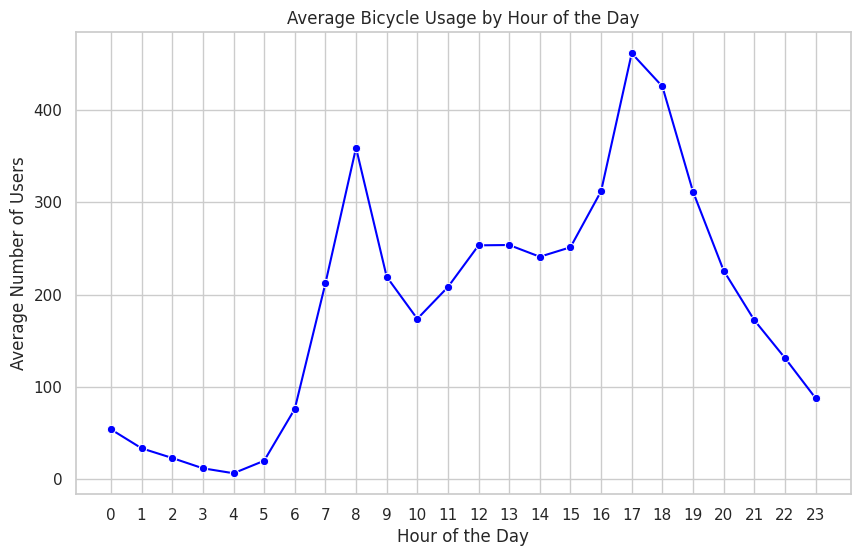

In [54]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_usage, marker="o", color='blue')
plt.title('Average Bicycle Usage by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Users')
plt.xticks(range(0, 24))  # Ensure all hours are shown
plt.grid(True)
plt.show()

In [55]:
peak_hour = hourly_usage.idxmax()
print(f"The peak hour is: {peak_hour}:00 with an average of {hourly_usage.max()} users.")

The peak hour is: 17:00 with an average of 461.45205479452056 users.


In [56]:
top_5_peak_hours = hourly_usage.sort_values(ascending=False).head(5)
print("Top 5 peak hours with the highest average number of users:",top_5_peak_hours)

Top 5 peak hours with the highest average number of users: hour
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
Name: total_count, dtype: float64


#Best Days

<ipython-input-57-837c7f705c86>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_usage.index, y=daily_usage.values, palette='Set2')


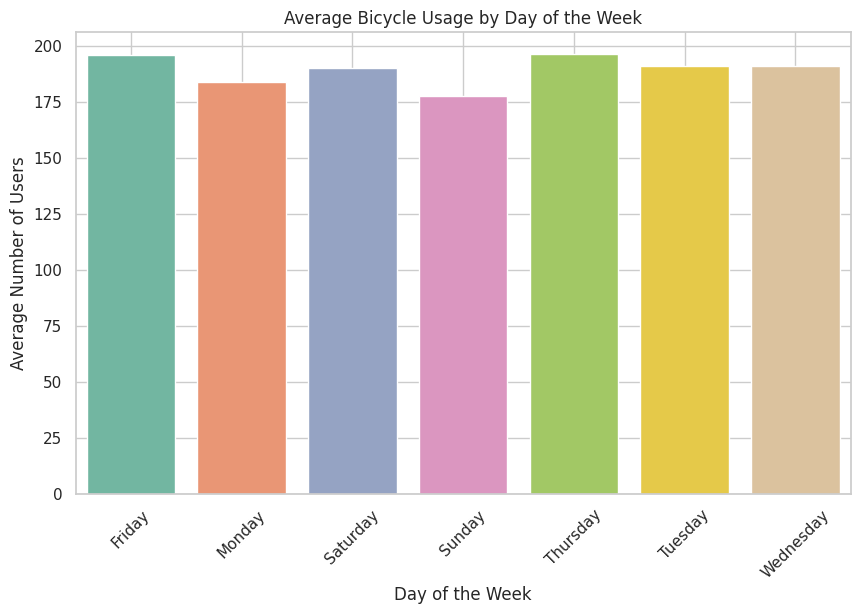

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_usage.index, y=daily_usage.values, palette='Set2')
plt.title('Average Bicycle Usage by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [59]:
busiest_day = daily_usage.idxmax()
print(f"The busiest day is: {busiest_day} with an average of {daily_usage.max()} users.")

The busiest day is: Thursday with an average of 196.43666531768514 users.


In [66]:
top_5_peak_days = daily_usage.sort_values(ascending=False).head(5)
print("Top 5 peak days with the highest average number of users:",top_5_peak_days)

Top 5 peak hours with the highest average number of users: weekday_name
Thursday     196.436665
Friday       196.135907
Tuesday      191.238891
Wednesday    191.130505
Saturday     190.209793
Name: total_count, dtype: float64


In [60]:
weekend_avg = daily_usage.loc[['Sunday', 'Saturday']].mean()
weekday_avg = daily_usage.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']].mean()
print(f"Weekend Average Usage: {weekend_avg}")
print(f"Weekday Average Usage: {weekday_avg}")

Weekend Average Usage: 183.83930896683927
Weekday Average Usage: 191.73732466793223


In [61]:
if weekend_avg > weekday_avg:
    print("Weekends are busier than weekdays.")
else:
    print("Weekdays are busier than weekends.")

Weekdays are busier than weekends.


#Best Months/Seasons

<ipython-input-62-71ae2b068135>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_usage.index, y=monthly_usage.values, palette='coolwarm')


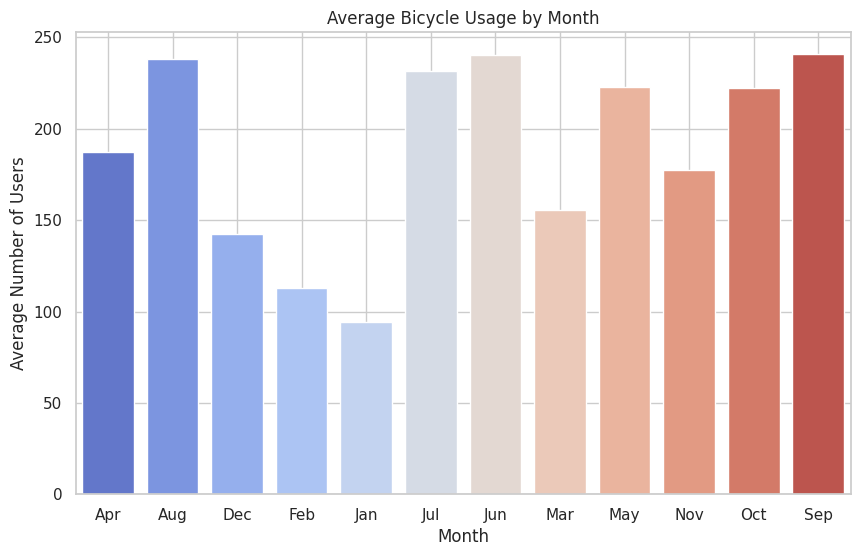

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_usage.index, y=monthly_usage.values, palette='coolwarm')
plt.title('Average Bicycle Usage by Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Users')
plt.grid(True)
plt.show()

In [63]:
busiest_month = monthly_usage.idxmax()
print(f"The busiest month is: {busiest_month} with an average of {monthly_usage.max()} users.")

The busiest month is: Sep with an average of 240.7731384829506 users.


In [67]:
top_5_peak_months = monthly_usage.sort_values(ascending=False).head(5)
print("Top 5 peak months with the highest average number of users:",top_5_peak_months)

Top 5 peak months with the highest average number of users: month_name
Sep    240.773138
Jun    240.515278
Aug    238.097627
Jul    231.819892
May    222.907258
Name: total_count, dtype: float64


<ipython-input-64-d23c1f3cfdac>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_usage.index, y=season_usage.values, palette='Accent')


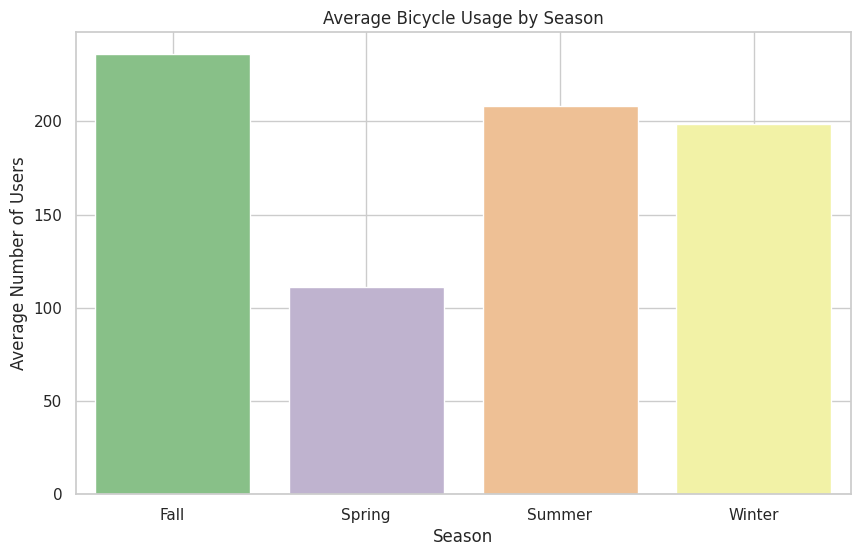

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x=season_usage.index, y=season_usage.values, palette='Accent')
plt.title('Average Bicycle Usage by Season')
plt.xlabel('Season')
plt.ylabel('Average Number of Users')
plt.grid(True)
plt.show()

In [65]:
busiest_season = season_usage.idxmax()
print(f"The busiest season is: {busiest_season} with an average of {season_usage.max()} users.")

The busiest season is: Fall with an average of 236.01623665480426 users.


#Best Weather Situation

<ipython-input-68-a8b89476c027>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weathersit_usage.index, y=weathersit_usage.values, palette='Accent')


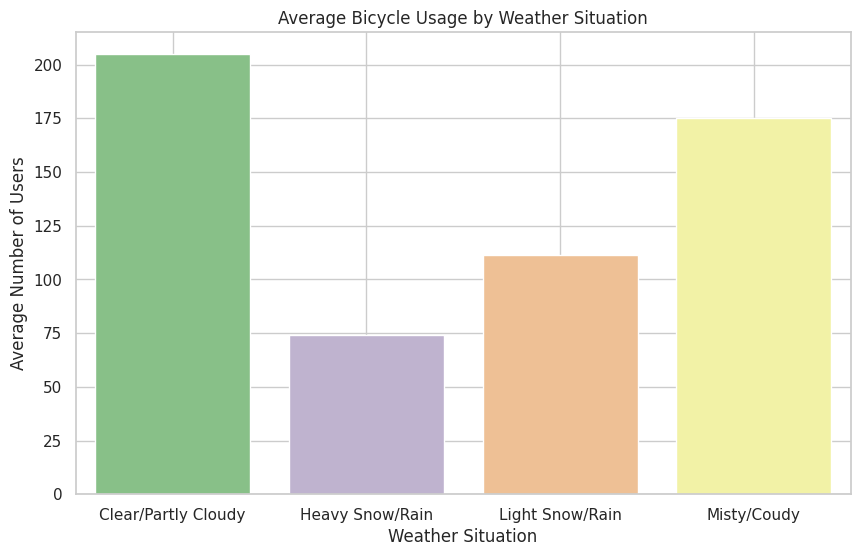

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(x=weathersit_usage.index, y=weathersit_usage.values, palette='Accent')
plt.title('Average Bicycle Usage by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Average Number of Users')
plt.grid(True)
plt.show()

In [70]:
busiest_weather = weathersit_usage.idxmax()
print(f"The busiest season is: {busiest_weather} with an average of {weathersit_usage.max()} users.")

The busiest season is: Clear/Partly Cloudy with an average of 204.8692718829405 users.


# Grouping Data

## Hourly Usage by Weekday

In [74]:
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
hourly_weekday_usage = df.groupby(['hour', 'weekday_name'])['total_count'].mean().unstack()[weekday_order]

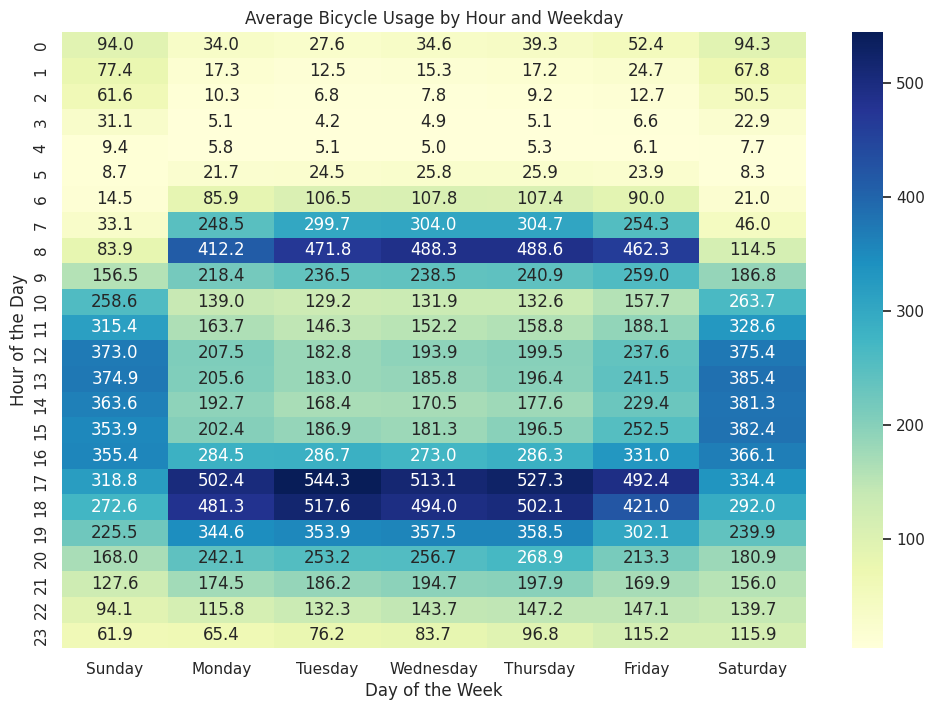

In [75]:
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_weekday_usage, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title('Average Bicycle Usage by Hour and Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

## Monthly Hourly Usage  

In [76]:
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
hourly_monthly_usage = df.groupby(['hour', 'month_name'])['total_count'].mean().unstack()[month_order]

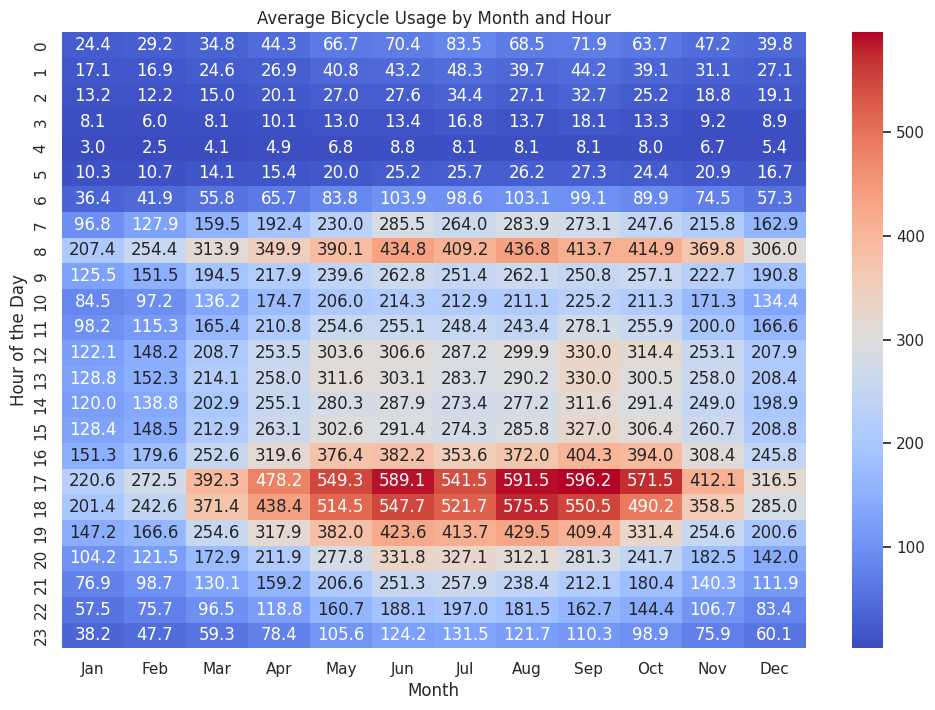

In [79]:
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_monthly_usage, cmap="coolwarm", annot=True, fmt=".1f")
plt.title('Average Bicycle Usage by Month and Hour')
plt.xlabel('Month')
plt.ylabel('Hour of the Day')
plt.show()

## Weekday Usage by Month

In [111]:
weekday_month_usage = df.groupby(['month_name', 'weekday_name'])['total_count'].mean().unstack()[weekday_order]

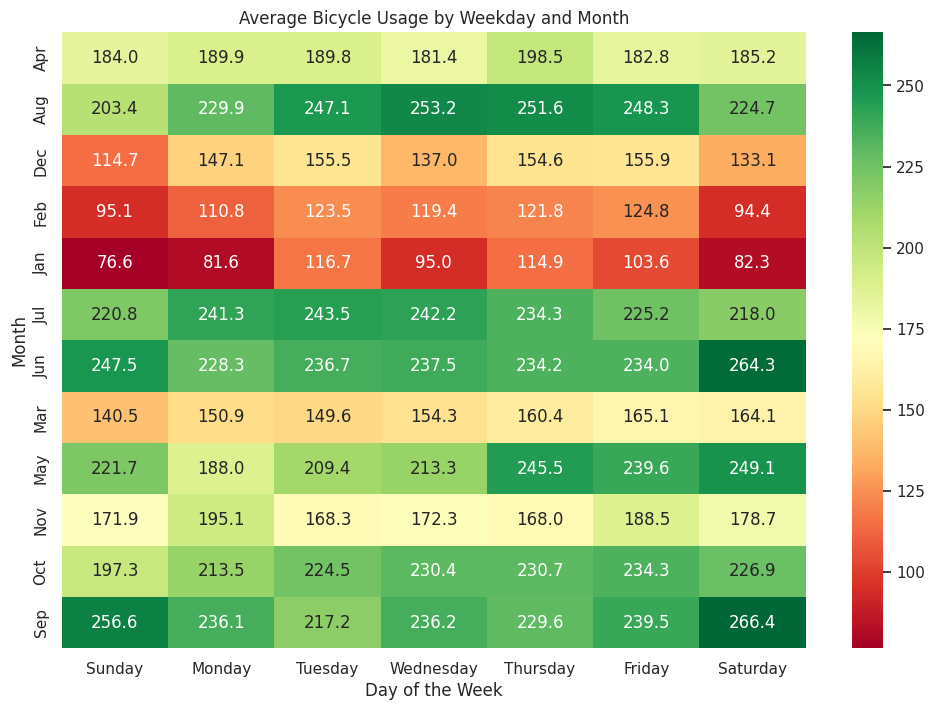

In [112]:
plt.figure(figsize=(12, 8))
sns.heatmap(weekday_month_usage, cmap="RdYlGn", annot=True, fmt=".1f")
plt.title('Average Bicycle Usage by Weekday and Month')
plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.show()

##Seasonal Usage by Hour

In [119]:
season_hourly_usage = df.groupby(['hour', 'season_name'])['total_count'].mean().unstack()

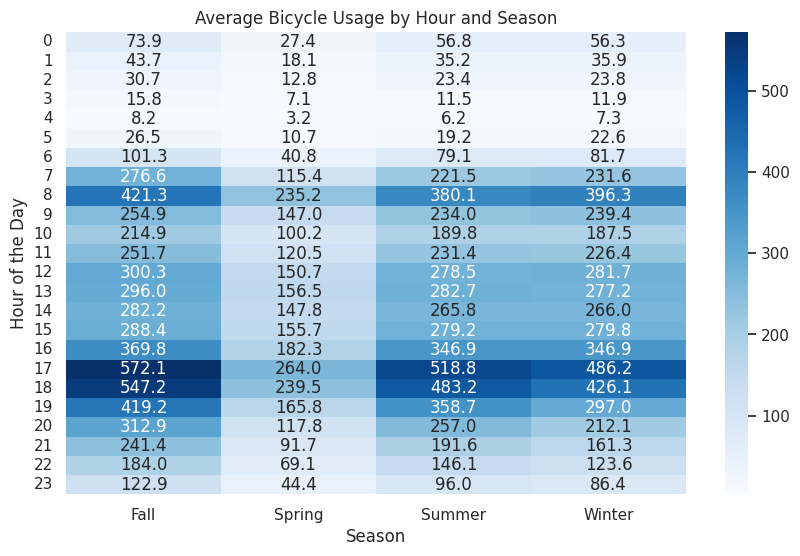

In [120]:
plt.figure(figsize=(10, 6))
sns.heatmap(season_hourly_usage, cmap="Blues", annot=True, fmt=".1f")
plt.title('Average Bicycle Usage by Hour and Season')
plt.xlabel('Season')
plt.ylabel('Hour of the Day')
plt.show()

##Combining Hour, Weekday, and Weather Conditions

In [124]:
weather_hourly_usage = df.groupby(['hour', 'weathersit_name', 'weekday_name'])['total_count'].mean().unstack()[weekday_order]

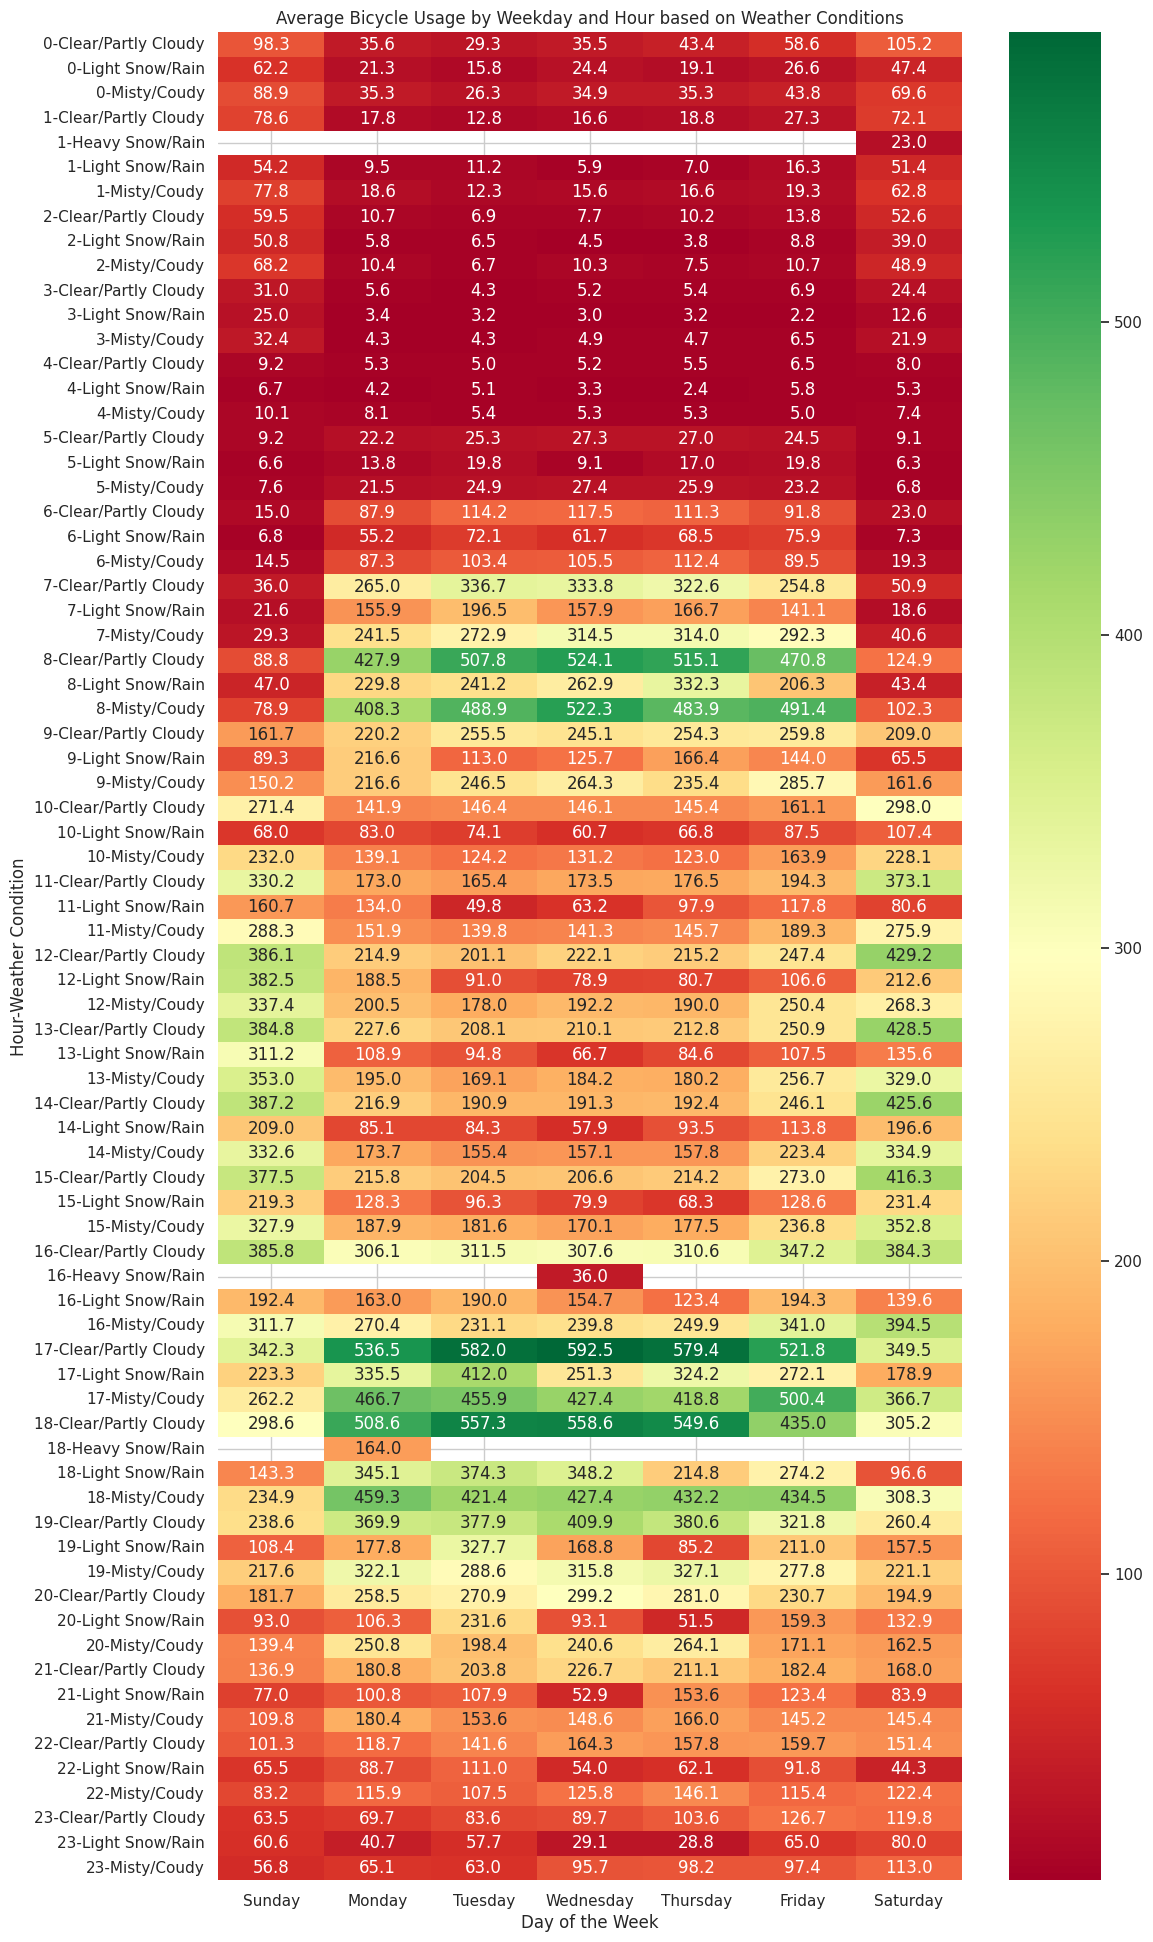

In [127]:
plt.figure(figsize=(12, 24))
sns.heatmap(weather_hourly_usage, cmap="RdYlGn", annot=True, fmt=".1f")
plt.title('Average Bicycle Usage by Weekday and Hour based on Weather Conditions')
plt.xlabel('Day of the Week')
plt.ylabel('Hour-Weather Condition')
plt.show()